# How Much Did It Rain?
My Kaggle Project on the 'How Much Did It Rain?' challenge.   
Link: [https://www.kaggle.com/competitions/how-much-did-it-rain-ii/data?select=train.zip] 

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR


In [2]:
# df = pd.read_csv('train.csv') Wont load


In [3]:
!ls -lh


total 4.1G
-rw-r--r--  1 omarali03 omarali03  12K Nov 13 18:06 'Kaggle Backup Challenge.ipynb'
-rw-r--r--  1 omarali03 omarali03 103K Dec 11 00:58 'Kaggle Challenge.ipynb'
drwxr-xr-x 10 omarali03 omarali03 4.0K Dec  4 02:15  Labs
drwxr-xr-x 20 omarali03 omarali03 4.0K Dec  4 02:15  Lectures
-rw-r--r--  1 omarali03 omarali03   21 Sep  1 11:17  README.md
-rw-r--r--  1 omarali03 omarali03 2.1G Dec  4 02:37  SUSY.csv
-rw-r--r--  1 omarali03 omarali03 200M Nov 12 21:48  how-much-did-it-rain-ii.zip
-rw-r--r--  1 omarali03 omarali03 696K Nov 13 04:11  space_train.csv
-rw-r--r--  1 omarali03 omarali03 154K Sep  1 11:17  syllabus.pdf
-rw-r--r--  1 omarali03 omarali03 619M Nov 12 21:53  test.csv
-rw-r--r--  1 omarali03 omarali03 6.6M Nov 29 12:17  test_small.csv
-rw-r--r--  1 omarali03 omarali03 1.2G Nov 12 21:55  train.csv
-rw-r--r--  1 omarali03 omarali03 8.5M Nov 13 13:08  train_small.csv


In [4]:
!wc -l train.csv

13765202 train.csv


In [5]:
!head -10 train.csv

Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
1,3,10.0,,,,,,,,,,,,,,,,,,,,,0.25400013
1,16,10.0,,,,,,,,,,,,,,,,,,,,,0.25400013
1,25,10.0,,,,,,,,,,,,,,,,,,,,,0.25400013
1,35,10.0,,,,,,,,,,,,,,,,,,,,,0.25400013
1,45,10.0,,,,,,,,,,,,,,,,,,,,,0.25400013
1,55,10.0,,,,,,,,,,,,,,,,,,,,,0.25400013
2,1,2.0,9.0,5.0,7.5,10.5,15.0,10.5,16.5,23.5,0.99833333,0.99833333,0.99833333,0.99833333,0.375,-0.125,0.3125,0.875,1.0599976,-1.4100037,-0.3500061,1.0599976,1.0160005
2,6,2.0,26.5,22.5,25.5,31.5,26.5,26.5,28.5,32.0,1.0016667,0.9816667,0.99833333,1.005,0.0625,-0.1875,0.25,0.6875,,,,1.4099884,1.0160005
2,11,2.0,21.5,15.5,20.5,25.0,26.5,23.5,25.0,27.0,1.0016667,0.995,0.99833333,1.0016667,0.3125,-0.0625,0.3125,0.625,0.34999084,,-0.3500061,1.7599945,1.0160005

In [6]:
!head -100000 train.csv > train_small.csv

In [7]:
df = pd.read_csv("train_small.csv")
df

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,3,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
1,1,16,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
2,1,25,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
3,1,35,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
4,1,45,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,9541,13,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.508
99995,9541,18,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.508
99996,9541,23,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.508
99997,9541,29,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.508


In [8]:
df['Expected']

0        0.254
1        0.254
2        0.254
3        0.254
4        0.254
         ...  
99994    0.508
99995    0.508
99996    0.508
99997    0.508
99998    0.508
Name: Expected, Length: 99999, dtype: float64

(array([3.2790e+03, 2.7972e+04, 1.0137e+04, 5.4500e+03, 4.8000e+01,
        5.8600e+03, 3.3080e+03, 2.9700e+03, 2.4080e+03, 7.6000e+01,
        3.0600e+03, 2.1910e+03, 2.4120e+03, 1.3500e+03, 6.5000e+01,
        1.4270e+03, 1.6800e+03, 1.5480e+03, 5.9000e+01, 1.0800e+03,
        1.7390e+03, 9.0200e+02, 6.1000e+02, 1.1900e+02, 5.5300e+02,
        3.6800e+02, 3.4500e+02, 2.9700e+02, 1.2000e+01, 4.8700e+02,
        4.3700e+02, 1.5500e+02, 0.0000e+00, 4.5300e+02, 1.6600e+02,
        5.7100e+02, 6.5000e+01, 0.0000e+00, 3.2700e+02, 1.9800e+02,
        2.6300e+02, 1.0000e+01, 0.0000e+00, 1.2100e+02, 1.3900e+02,
        1.6400e+02, 7.6000e+01, 0.0000e+00, 2.5900e+02, 3.7000e+01,
        2.0700e+02, 0.0000e+00, 3.0700e+02, 8.8000e+01, 1.1600e+02,
        8.1000e+01, 0.0000e+00, 2.0200e+02, 1.5000e+02, 1.0300e+02,
        1.8800e+02, 0.0000e+00, 1.4600e+02, 2.4200e+02, 5.0000e+01,
        0.0000e+00, 6.8000e+01, 1.1000e+02, 0.0000e+00, 6.5000e+01,
        1.1380e+03, 8.7000e+01, 7.5000e+01, 3.06

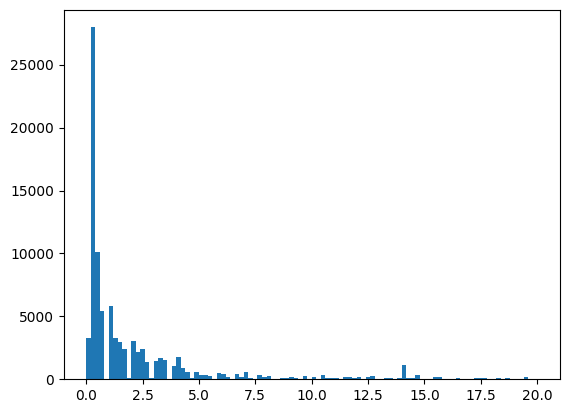

In [9]:
plt.hist(df["Expected"],bins = 100,range = (0,20))

In [10]:
!head -100000 test.csv > test_small.csv

In [11]:
# Removing columns for better results
drop_columns = ['Id']
df = pd.read_csv('train_small.csv')
new_df = df.drop(columns = drop_columns)
new_df

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,3,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
1,16,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
2,25,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
3,35,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
4,45,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,13,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.508
99995,18,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.508
99996,23,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.508
99997,29,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.508


In [21]:
#Training model
'''X_train = df.drop('Expected', axis=1)
y_train = df['Expected']
X_train.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
model = LinearRegression()
model.fit(X_train,y_train)'''

"X_train = df.drop('Expected', axis=1)\ny_train = df['Expected']\nX_train.fillna(0, inplace=True)\ny_train.fillna(0, inplace=True)\nmodel = LinearRegression()\nmodel.fit(X_train,y_train)"

In [64]:
#Training with LR
X = new_df.drop("Expected", axis = 1)
y = new_df["Expected"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
X_test.fillna(0,  inplace = True)
y_test.fillna(0,  inplace = True)

In [66]:
modelLR = LinearRegression()
modelLR.fit(X_train,y_train)

LinearRegression()

In [67]:
modelLR.score(X_test,y_test)


0.02994951728865225

In [72]:
print(mean_squared_error(y_test,modelLR.predict(X_test)))
print(mean_absolute_error(y_test,modelLR.predict(X_test)))


470396.6935953925
236.41665541431038


In [38]:
y_pred = model.predict(X_test)

In [42]:
eval = y_test - y_pred

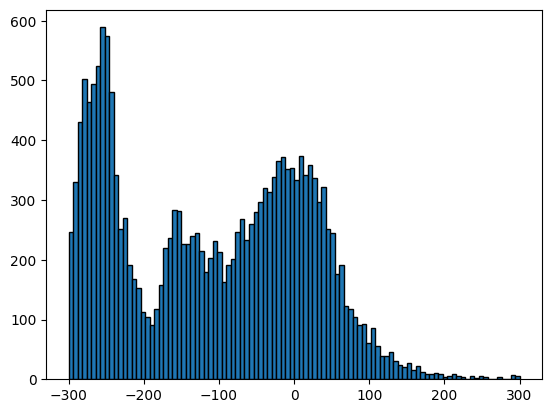

In [75]:
plt.hist(eval, bins=100,range=(-300,300),edgecolor='black')
plt.show()

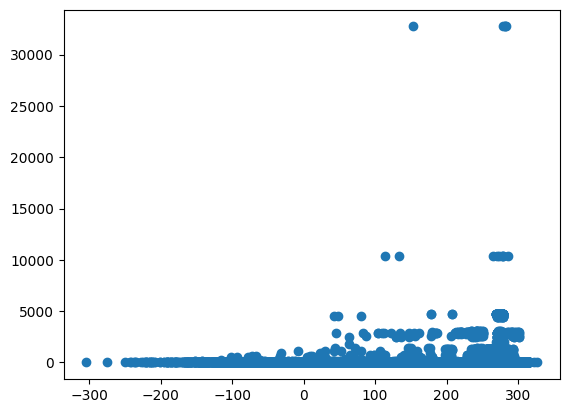

In [50]:
plt.scatter(y_pred, y_test)

In [51]:
# now to try svm

In [56]:
model = SVR(kernel = 'linear')
model.fit(X_train,y_train)

SVR(kernel='linear')

In [57]:
y_pred = model.predict(X_test)


In [58]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 642187.0581513933
Root Mean Squared Error: 801.3657455565426


In [73]:
model.score(X_test,y_test)

0.030136310537067557

In [59]:
def process_data(df):
    df_mean = df.groupby('Id').mean()
    df_mean.fillna(0,inplace=True)
    df_mean.reset_index(inplace=True)
    return df_mean

In [60]:
df_mean = process_data(df)
df_mean['Expected'].describe()


count     9541.000000
mean       138.896309
std        697.121006
min          0.010000
25%          0.254000
50%          0.762000
75%          3.556002
max      32740.617000
Name: Expected, dtype: float64

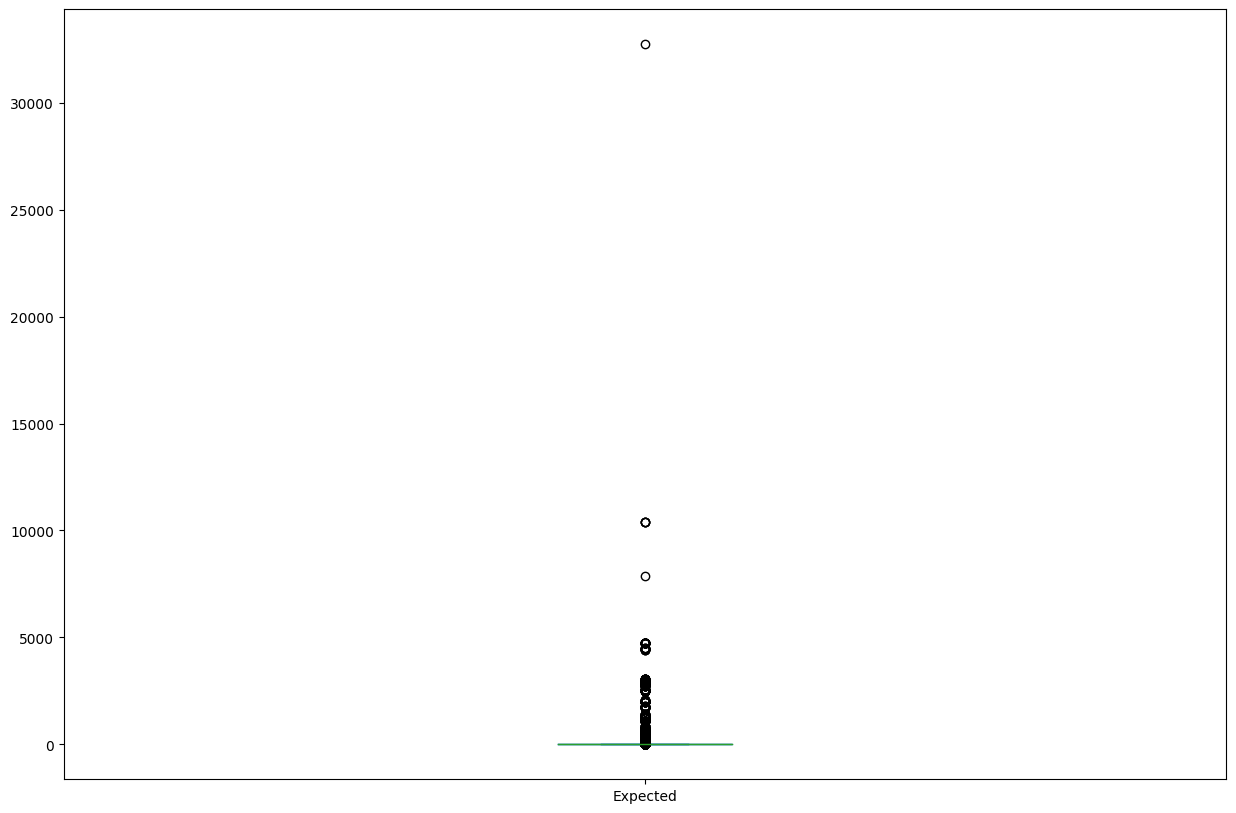

In [61]:
plt.figure(figsize=(15,10))
df_mean['Expected'].plot(kind='box')
plt.show()

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 9.757e+03, 6.874e+03, 8.290e+02, 5.740e+02, 8.100e+01,
        1.330e+02, 2.600e+01, 1.500e+01, 8.000e+00, 4.000e+00, 3.200e+01,
        3.500e+01, 2.300e+01, 7.000e+00, 3.500e+01, 5.000e+00, 3.000e+00,
        5.000e+00, 2.000e+00, 1.000e+00, 8.000e+00, 1.200e+01, 1.100e+01,
        0.000e+00, 9.000e+00, 2.600e+01, 4.000e+01, 6.000e+00, 1.050e+02,
        2.000e+00, 3.200e+01, 0.000e+0

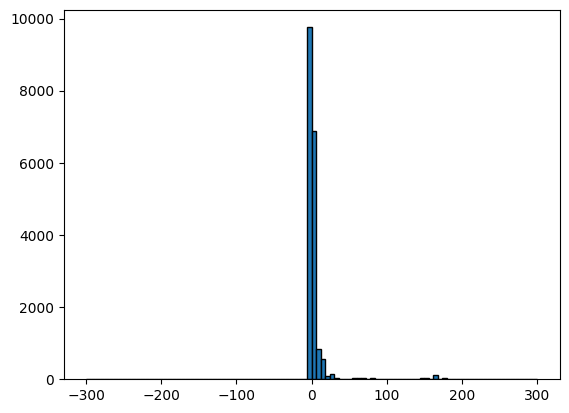

In [74]:
plt.hist(y_test - y_pred, bins=100,range=(-300,300),edgecolor='black')
